In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

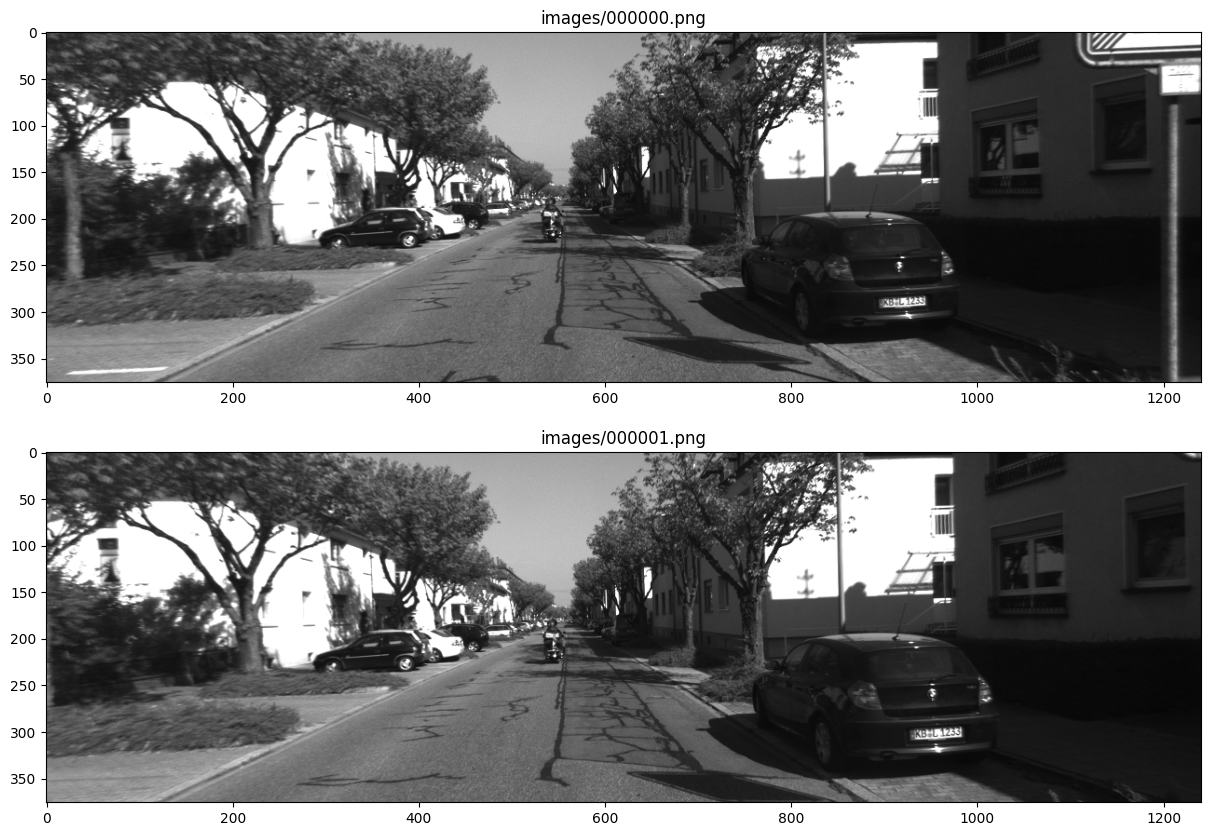

In [3]:
image_filename = "images/000000.png"
image1_filename = "images/000001.png"

image = cv2.imread(image_filename)
image1 = cv2.imread(image1_filename)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.title(f"{image_filename}")
plt.imshow(image)

plt.subplot(2, 1, 2)
plt.title(f"{image1_filename}")
plt.imshow(image1)
plt.show()

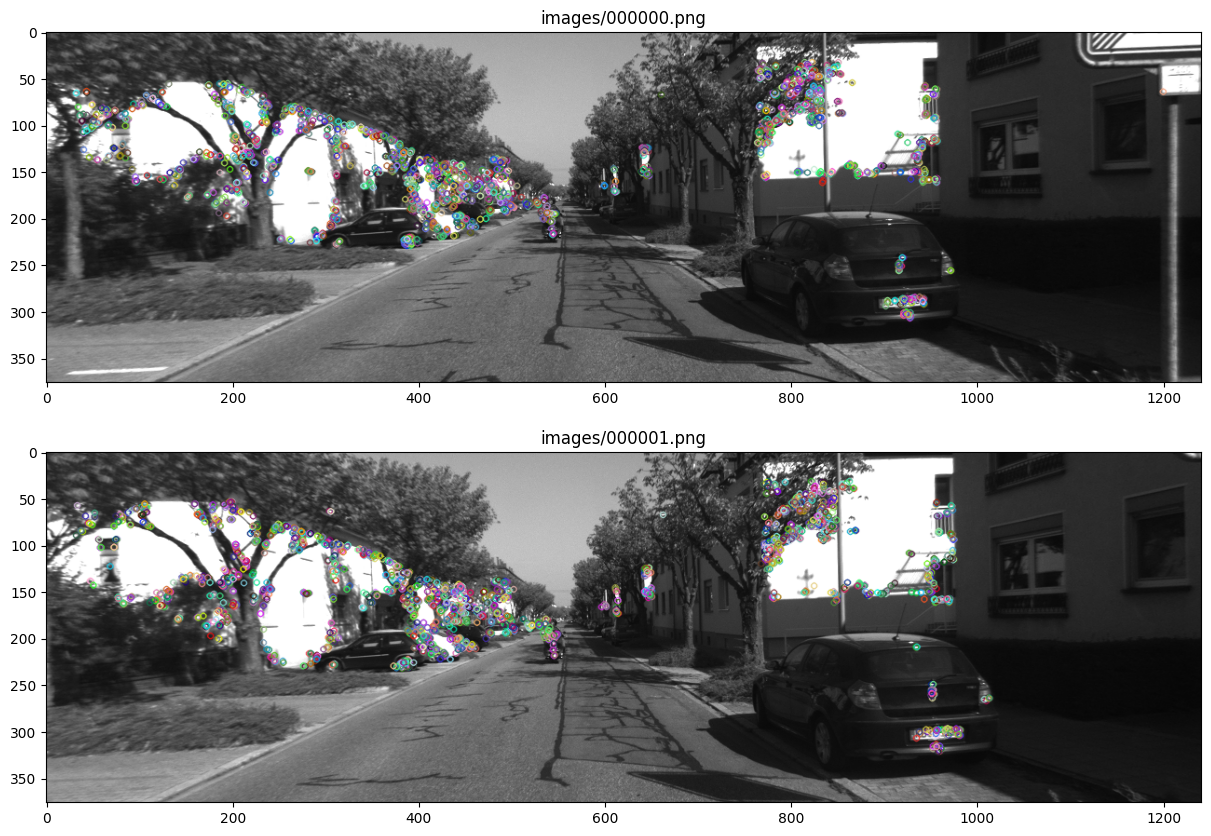

In [4]:
orb = cv2.ORB.create(nfeatures=2000)

kps, desc = orb.detectAndCompute(image, None)
kps1, desc1 = orb.detectAndCompute(image1, None)

image_kps = cv2.drawKeypoints(image, kps, None)
image1_kps = cv2.drawKeypoints(image1, kps1, None)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.imshow(image_kps)
plt.title(f"{image_filename}")

plt.subplot(2, 1, 2)
plt.imshow(image1_kps)
plt.title(f"{image1_filename}")
plt.show()

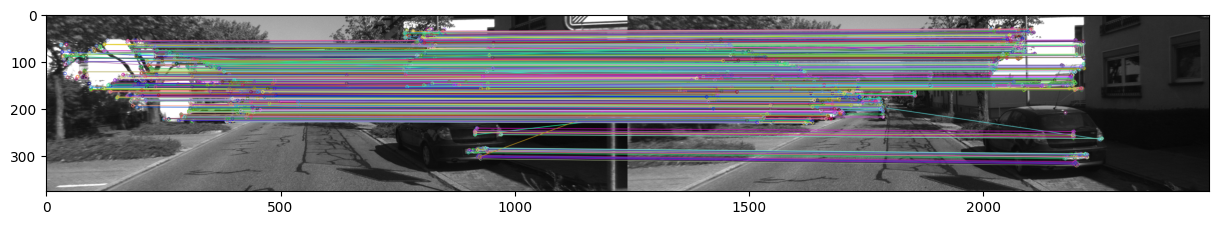

In [5]:
# Matching
orb_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = orb_matcher.match(desc, desc1)

image_matches = cv2.drawMatches(image, kps, image1, kps1, matches, None)

plt.figure(figsize=(15, 10))
plt.imshow(image_matches)
plt.show()

In [6]:
def draw_rectangle_to_each_keypoints(image, kps, rect_width_half):
    for kp in kps:
        cv2.rectangle(image, 
                    (int(kp.pt[0]) - rect_width_half, int(kp.pt[1]) - rect_width_half),
                    (int(kp.pt[0]) + rect_width_half, int(kp.pt[1]) + rect_width_half),
                    color=(0, 255, 0))
    

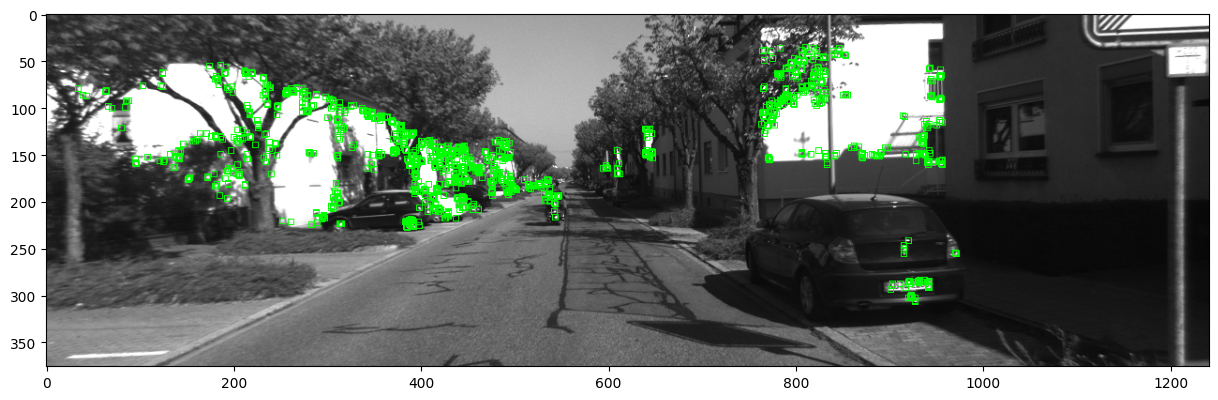

In [7]:
image_rect_kps = image.copy()

rect_width = 7
rect_width_half = rect_width//2

matches_kps = [kps[match.queryIdx] for match in matches]

draw_rectangle_to_each_keypoints(image_rect_kps, matches_kps, rect_width_half)


plt.figure(figsize=(15, 10))
plt.imshow(image_rect_kps)
plt.show()

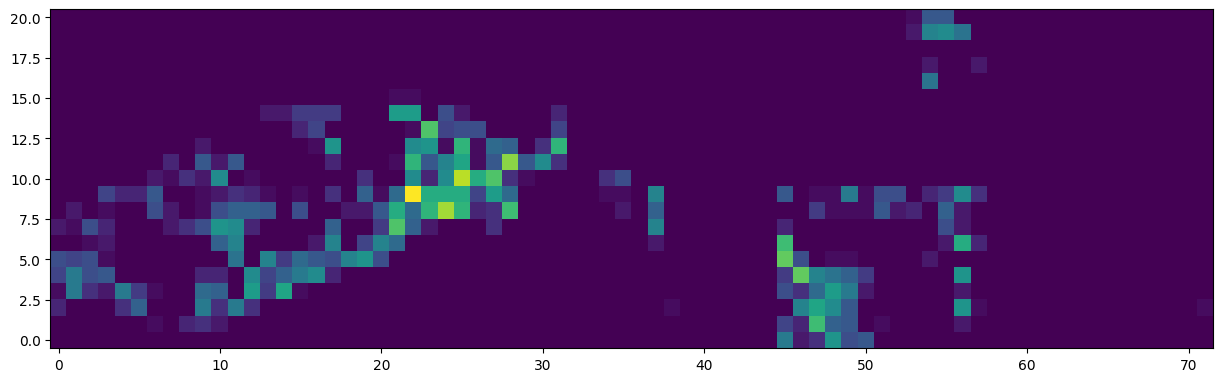

In [16]:
kps_x_list = []
kps_y_list = []

# extract coordinates
for kp in kps:
    kps_x_list.append(kp.pt[0])
    kps_y_list.append(kp.pt[1])

# make histogram
# xedges = [50 * x for x in range(nCols+1)]
# xedges.append(image.shape[1])
# yedges = [50 * y for y in range(nRows+1)]
# yedges.append(image.shape[0])
xbins = nCols*3
ybins = nRows*3
H, xedges, yedges = np.histogram2d(kps_x_list, kps_y_list, bins=[xbins, ybins])

# X, Y, = np.meshgrid(xedges, yedges)
plt.figure(figsize=(15,10))
# plt.pcolormesh(X, Y[::-1], H)
plt.imshow(H.T, origin='lower')
plt.show()

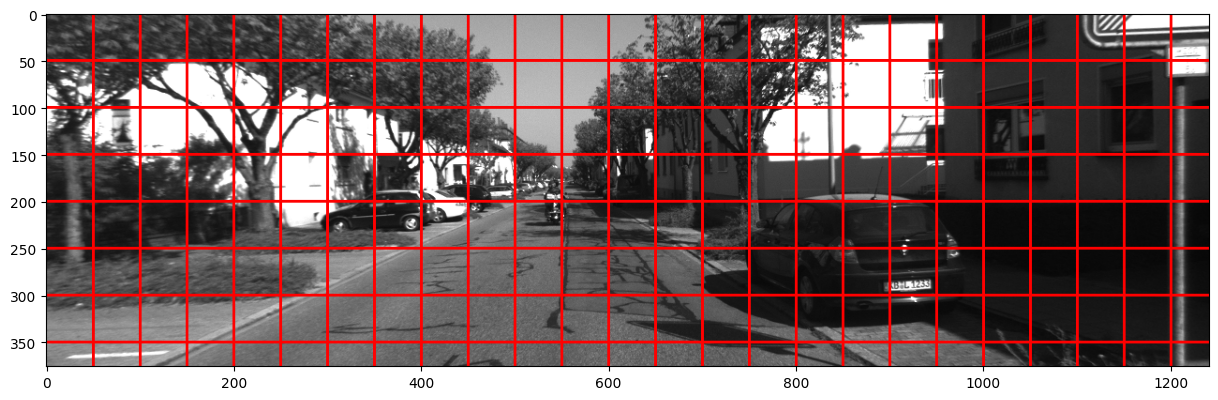

In [17]:
patch_width = 50
patch_height = 50

nRows = image.shape[0]//patch_height
nCols = image.shape[1]//patch_width

image_lines = image.copy()
# image_lines = image_rect_kps.copy()

# 가로줄
for nR in range(1, nRows+1):
    row = nR * patch_height
    image_lines = cv2.line(image_lines, (0, row), (image_lines.shape[1], row), (255, 0, 0), 2, 0)

# 세로줄
for nC in range(1, nCols+1):
    col = nC * patch_width
    image_lines = cv2.line(image_lines, (col, 0), (col, image_lines.shape[0]), 
                           color=(255, 0, 0), 
                           thickness=2, 
                           lineType=cv2.LINE_4)

plt.figure(figsize=(15, 10))
plt.imshow(image_lines)
plt.show()

In [18]:
nCols, nRows

(24, 7)

In [19]:
patch_kps = [[[] for _ in range(nCols)] for _ in range(nRows)]

for kp in matches_kps:
    row_idx = int(kp.pt[1]//patch_height)
    col_idx = int(kp.pt[0]//patch_width)

    patch_kps[row_idx][col_idx].append(kp)

# # check
# for r in range(nRows):
#     for c in range(nCols):
#         print(f"R: {r}, C: {c}")
#         print(len(patch_kps[r][c]))

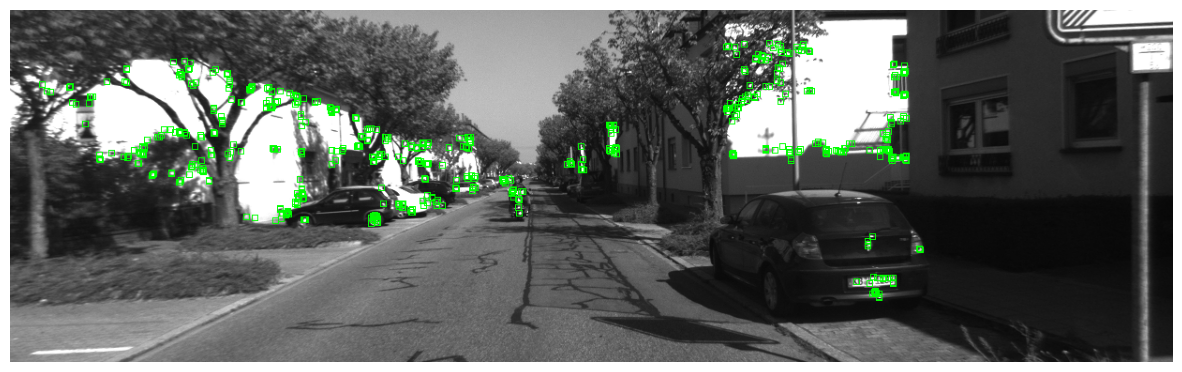

In [29]:
max_kps_per_patch = 15
filtered_patch_kps = [[[] for _ in range(nCols)] for _ in range(nRows)]

# image_filtered_kps = image_lines.copy()
image_filtered_kps = image.copy()

# filter kps
for r in range(nRows):
    for c in range(nCols):
        
        patch_kps[r][c].sort(key=lambda x: x.response, reverse=True)
        filtered_patch_kps[r][c] = patch_kps[r][c][:max_kps_per_patch]
        
        # image_filtered_kps = cv2.drawKeypoints(image_filtered_kps, patch_kps[r][c], None)
        draw_rectangle_to_each_keypoints(image_filtered_kps, filtered_patch_kps[r][c], 3)

# plot
plt.figure(figsize=(15, 10))
plt.imshow(image_filtered_kps)
plt.axis('off')
plt.show()


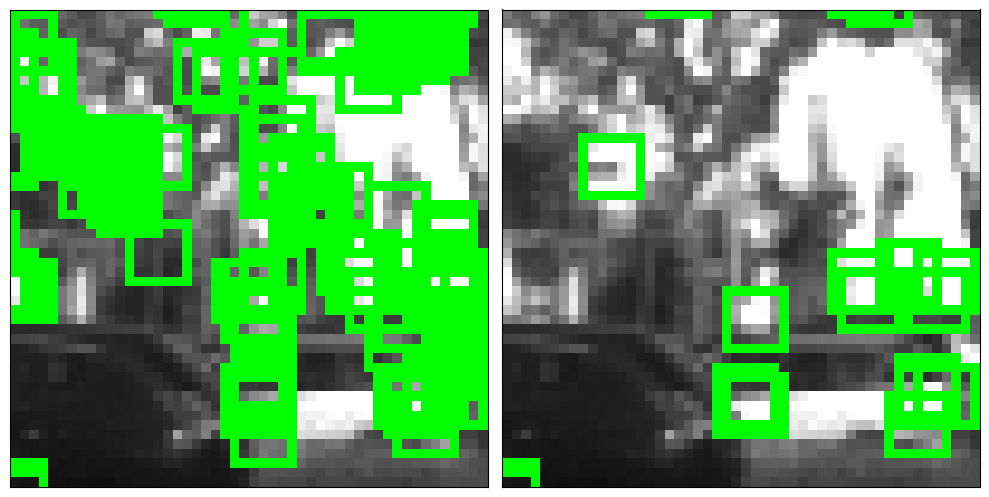

In [32]:
patch_before_filtering = image_rect_kps[3*patch_height:4*patch_height, 9*patch_width:10*patch_width]
patch_after_filtering = image_filtered_kps[3*patch_height:4*patch_height, 9*patch_width:10*patch_width]

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(patch_before_filtering)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(patch_after_filtering)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

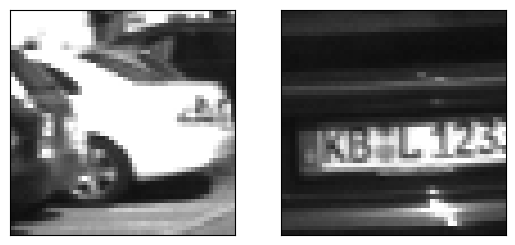

In [54]:
s = 50

p1 = image[180:180+s, 400:400+s]
p2 = image[260:260+s, 890:890+s]

plt.subplot(1, 2, 1)
plt.imshow(p1)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(p2)
plt.xticks([])
plt.yticks([])

plt.show()

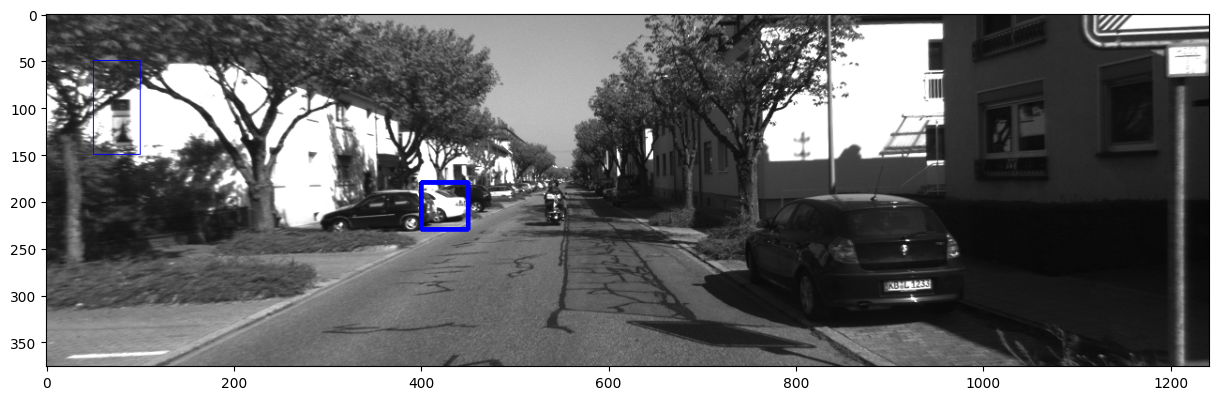

In [70]:
image_p = image.copy()

image_p = cv2.rectangle(image_p, pt1=(400, 180), pt2=(400+s, 180+s), color=(255, 0, 0), thickness=1)
image_p = cv2.rectangle(image_p, (50, 50), (100, 150), (255, 0, 0), 1)
image_p = cv2.rectangle(image_p, (260, 890), (260+s, 890+s), (255, 0, 0), 1)

image_p = cv2.cvtColor(image_p, cv2.COLOR_BGR2RGB)
# plt.subplot(2, 2, 3)

plt.figure(figsize=(15, 10))
plt.imshow(image_p)
# plt.xticks([])
# plt.yticks([])
plt.show()

In [17]:
cv2.imwrite('images/image_rect_kps.png', image_rect_kps)

True

In [18]:
cv2.imwrite('images/image_filtered_kps.png', cv2.cvtColor(image_filtered_kps, cv2.COLOR_BGR2RGB))

True

In [19]:
cv2.imwrite("images/image_lines.png", cv2.cvtColor(image_lines, cv2.COLOR_BGR2RGB))

True